In [1]:
# Feature Engineering / Text Processing

# Preparation

# Required Libraries
# !pip install pandas nltk matplotlib scipy sklearn

# Import libraries
import pandas as pd
import os

# Check and Set Working Directory
cwd = os.getcwd()
print(f"Current working directory: {cwd}")

# Set working directory if needed
# os.chdir('<your-directory-path>')

# Load the Dataset
federalist = pd.read_csv("federalist.csv")

# Display the dataset
print(federalist.head())

# Display column names
print(federalist.columns)


Current working directory: /Users/petrotolochko/Desktop/Teaching/text-as-data-python/day_1
     author                                               text date  \
0  HAMILTON  To the People of the State of New York:\n\nAFT...  NaN   
1       JAY  To the People of the State of New York:\n\nWHE...  NaN   
2       JAY  To the People of the State of New York:\n\nIT ...  NaN   
3       JAY  To the People of the State of New York:\n\nMY ...  NaN   
4       JAY  To the People of the State of New York:\n\nQUE...  NaN   

                                               title  paper_id  \
0                               General Introduction         1   
1  Concerning Dangers from Foreign Force and Infl...         2   
2  The Same Subject Continued (Concerning Dangers...         3   
3  The Same Subject Continued (Concerning Dangers...         4   
4  The Same Subject Continued (Concerning Dangers...         5   

                         venue  
0  For the Independent Journal  
1  For the Independ

In [5]:
# Let's see how a text looks like
print(federalist['text'][0])  # Display the first text in the dataset

# Basic Pre-processing

# Import necessary libraries
import re

# Preprocess the text
federalist['clean_text'] = federalist['text'].str.lower()  # Convert to lowercase
federalist['clean_text'] = federalist['clean_text'].str.replace(r'\n', ' ', regex=True)  # Replace '\n' with space
federalist['clean_text'] = federalist['clean_text'].str.replace(r'[^\w\s]', '', regex=True)  # Remove punctuation

# Count specific words using regex
federalist['man_count'] = federalist['clean_text'].str.count(r'\bman\b')  # Count occurrences of 'man'
federalist['by_count'] = federalist['clean_text'].str.count(r'\bby\b')    # Count occurrences of 'by'
federalist['upon_count'] = federalist['clean_text'].str.count(r'\bupon\b')  # Count occurrences of 'upon'

# Calculate text length in words
federalist['text_length'] = federalist['clean_text'].apply(lambda x: len(x.split()))


To the People of the State of New York:

AFTER an unequivocal experience of the inefficacy of the
subsisting federal government, you are called upon to deliberate on
a new Constitution for the United States of America. The subject
speaks its own importance; comprehending in its consequences
nothing less than the existence of the UNION, the safety and welfare
of the parts of which it is composed, the fate of an empire in many
respects the most interesting in the world. It has been frequently
remarked that it seems to have been reserved to the people of this
country, by their conduct and example, to decide the important
question, whether societies of men are really capable or not of
establishing good government from reflection and choice, or whether
they are forever destined to depend for their political
constitutions on accident and force. If there be any truth in the
remark, the crisis at which we are arrived may with propriety be
regarded as the era in which that decision is to be mad

In [6]:

# Display a processed text
print(federalist['clean_text'][0])

# Display the word counts
print(federalist[['man_count', 'by_count', 'upon_count']])


to the people of the state of new york  after an unequivocal experience of the inefficacy of the subsisting federal government you are called upon to deliberate on a new constitution for the united states of america the subject speaks its own importance comprehending in its consequences nothing less than the existence of the union the safety and welfare of the parts of which it is composed the fate of an empire in many respects the most interesting in the world it has been frequently remarked that it seems to have been reserved to the people of this country by their conduct and example to decide the important question whether societies of men are really capable or not of establishing good government from reflection and choice or whether they are forever destined to depend for their political constitutions on accident and force if there be any truth in the remark the crisis at which we are arrived may with propriety be regarded as the era in which that decision is to be made and a wrong

# Federalist Analysis [Simplified from (Grimmer at al., 2022)]

## Multinomial Model!

We'll do something else later, I promise.


Let's calculate the word rates for Hamilton, Madison, and Jay. Call them $\mu_{h}$, $\mu_{m}$, and $\mu_{j}$:

In [7]:
# Federalist Analysis: Multinomial Model

# Calculate word rates for Hamilton, Madison, and Jay
mu_madison = federalist[federalist['author'] == 'MADISON'][['man_count', 'by_count', 'upon_count']].sum()
mu_hamilton = federalist[federalist['author'] == 'HAMILTON'][['man_count', 'by_count', 'upon_count']].sum()
mu_jay = federalist[federalist['author'] == 'JAY'][['man_count', 'by_count', 'upon_count']].sum()

# Check word rates
print("Madison Word Rates:\n", mu_madison)
print("Hamilton Word Rates:\n", mu_hamilton)
print("Jay Word Rates:\n", mu_jay)

# Calculate probabilities (word models)
mu_hat_hamilton = mu_hamilton / mu_hamilton.sum()
mu_hat_madison = mu_madison / mu_madison.sum()
mu_hat_jay = mu_jay / mu_jay.sum()

# Check probabilities
print("Hamilton Word Probabilities:\n", mu_hat_hamilton)
print("Madison Word Probabilities:\n", mu_hat_madison)
print("Jay Word Probabilities:\n", mu_hat_jay)

Madison Word Rates:
 man_count      17
by_count      474
upon_count      7
dtype: int64
Hamilton Word Rates:
 man_count     102
by_count      859
upon_count    374
dtype: int64
Jay Word Rates:
 man_count      0
by_count      82
upon_count     1
dtype: int64
Hamilton Word Probabilities:
 man_count     0.076404
by_count      0.643446
upon_count    0.280150
dtype: float64
Madison Word Probabilities:
 man_count     0.034137
by_count      0.951807
upon_count    0.014056
dtype: float64
Jay Word Probabilities:
 man_count     0.000000
by_count      0.987952
upon_count    0.012048
dtype: float64


These are their word models! We're almost there...
Now, the Federalist paper ***#49*** is one of the disputed ones. First, let's see it:


In [8]:

# Inspect the disputed Federalist paper #49
print("Federalist Paper #49 Text:\n", federalist['clean_text'][48])  # 0-based indexing
print("Federalist Paper #49 Row:\n", federalist.iloc[48])  # Access the entire row

# Extract word counts for the disputed paper
mu_disputed = federalist.iloc[48][['man_count', 'by_count', 'upon_count']]

# Display disputed word counts
print("Disputed Paper Word Counts:\n", mu_disputed)


Federalist Paper #49 Text:
 to the people of the state of new york  the author of the notes on the state of virginia quoted in the last paper has subjoined to that valuable work the draught of a constitution which had been prepared in order to be laid before a convention expected to be called in 1783 by the legislature for the establishment of a constitution for that commonwealth the plan like every thing from the same pen marks a turn of thinking original comprehensive and accurate and is the more worthy of attention as it equally displays a fervent attachment to republican government and an enlightened view of the dangerous propensities against which it ought to be guarded one of the precautions which he proposes and on which he appears ultimately to rely as a palladium to the weaker departments of power against the invasions of the stronger is perhaps altogether his own and as it immediately relates to the subject of our present inquiry ought not to be overlooked his proposition is 

In [10]:
from scipy.stats import multinomial

# Convert probabilities and counts to numpy arrays for compatibility with scipy
mu_disputed_array = mu_disputed.values
mu_hat_hamilton_array = mu_hat_hamilton.values
mu_hat_madison_array = mu_hat_madison.values
mu_hat_jay_array = mu_hat_jay.values

# Calculate probabilities for the disputed paper
p_disputed_hamilton = multinomial.pmf(mu_disputed_array, n=mu_disputed_array.sum(), p=mu_hat_hamilton_array)
p_disputed_madison = multinomial.pmf(mu_disputed_array, n=mu_disputed_array.sum(), p=mu_hat_madison_array)
p_disputed_jay = multinomial.pmf(mu_disputed_array, n=mu_disputed_array.sum(), p=mu_hat_jay_array)

# Display the results
print("Probability that the disputed paper was written by Hamilton:", p_disputed_hamilton)
print("Probability that the disputed paper was written by Madison:", p_disputed_madison)
print("Probability that the disputed paper was written by Jay:", p_disputed_jay)


Probability that the disputed paper was written by Hamilton: 0.0010652589518326764
Probability that the disputed paper was written by Madison: 0.0755462739748687
Probability that the disputed paper was written by Jay: 0.0



As ***HOMEWORK*** (**Not graded**): try all the words (not just the ones we used here) and see if you get better or worse results. For additional ***no points*** you can also play around with *Laplace smoothing* -- i.e., adding a small number to the model to eliminate 0 probability words (e.g., add `1` to all counts before calculating probability).




# Vector Space Model

Let's look at the Federalist papers as vectors. Just the selected words for now (so, in the `man`, `by`, `upon` vector space).
We already have them as vector representations:

    by  upon    author
0  474     7   Madison
1  859   374  Hamilton
2   82     1       Jay
3   15     0  Disputed


NameError: name 'mpatches' is not defined

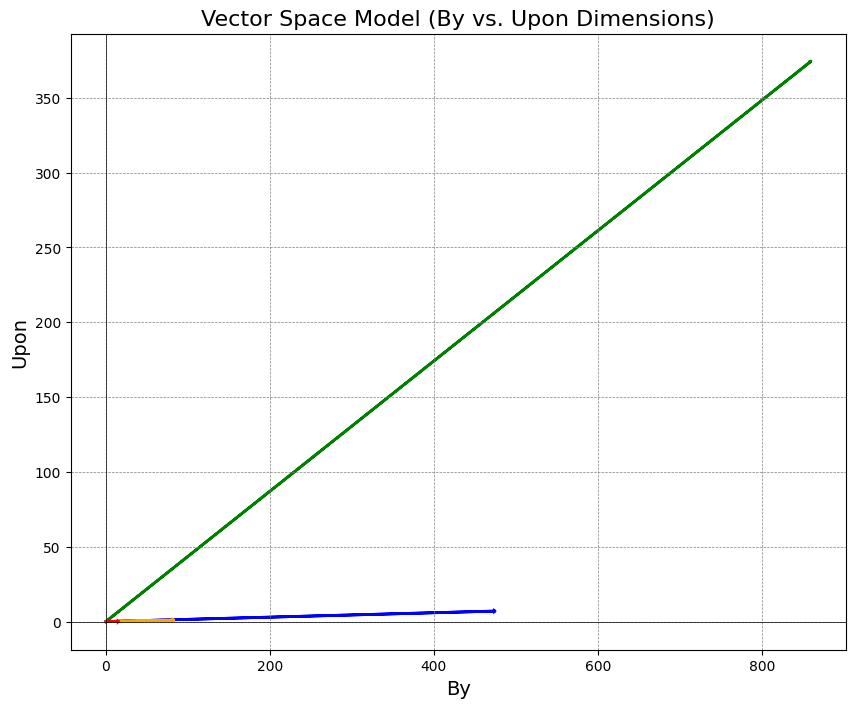

In [12]:
# Vector Space Model

# Combine vectors for Madison, Hamilton, Jay, and the disputed paper
vector_visualizations = pd.DataFrame({
    "man": [mu_madison["man_count"], mu_hamilton["man_count"], mu_jay["man_count"], mu_disputed["man_count"]],
    "by": [mu_madison["by_count"], mu_hamilton["by_count"], mu_jay["by_count"], mu_disputed["by_count"]],
    "upon": [mu_madison["upon_count"], mu_hamilton["upon_count"], mu_jay["upon_count"], mu_disputed["upon_count"]],
    "author": ["Madison", "Hamilton", "Jay", "Disputed"]
})

# Remove the "man" dimension for visualization
vector_visualizations_no_man = vector_visualizations.drop(columns=["man"])

# Display the data
print(vector_visualizations_no_man)

# Visualization of vectors in 2D (by and upon dimensions) with separate colors
import matplotlib.pyplot as plt

# Define colors for each author
colors = {
    "Madison": "blue",
    "Hamilton": "green",
    "Jay": "orange",
    "Disputed": "red"
}

# Set up the plot
plt.figure(figsize=(10, 8))

# Draw vector arrows with separate colors
for _, row in vector_visualizations_no_man.iterrows():
    plt.arrow(0, 0, row["by"], row["upon"],
              head_width=0.2, head_length=0.2, linewidth=2,
              color=colors[row["author"]], label=row["author"])

# Add labels and style
plt.title("Vector Space Model (By vs. Upon Dimensions)", fontsize=16)
plt.xlabel("By", fontsize=14)
plt.ylabel("Upon", fontsize=14)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Add legend
handles = [mpatches.Patch(color=color, label=author) for author, color in colors.items()]
plt.legend(handles=handles, loc="upper left", fontsize=12)

# Show the plot
plt.show()



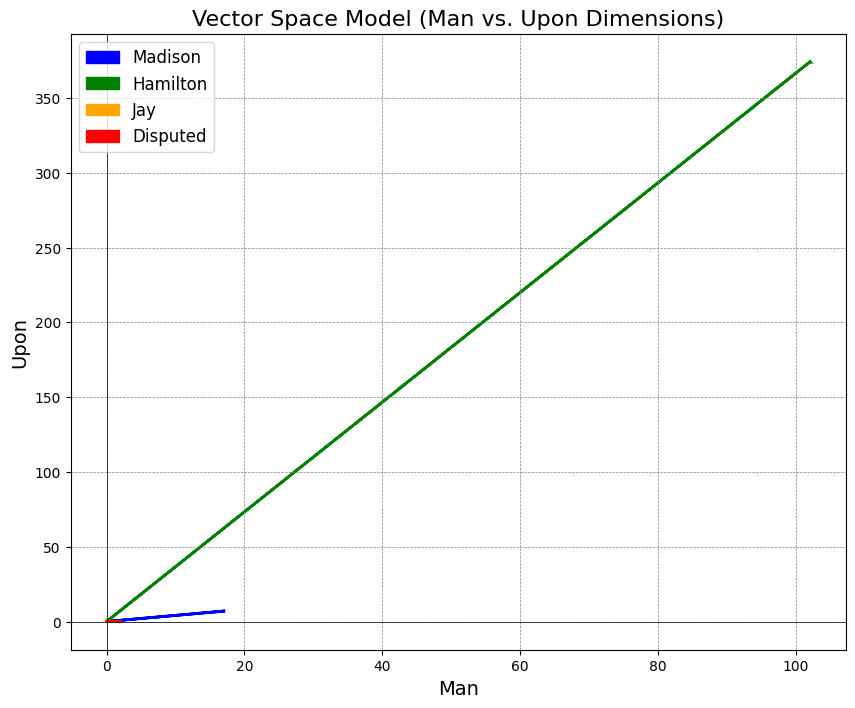

In [13]:
# Remove the "by" dimension for visualization
vector_visualizations_no_by = vector_visualizations.drop(columns=["by"])

# Visualization of vectors in 2D (man and upon dimensions) with separate colors
import matplotlib.patches as mpatches

# Set up the plot
plt.figure(figsize=(10, 8))

# Draw vector arrows with separate colors
for _, row in vector_visualizations_no_by.iterrows():
    plt.arrow(0, 0, row["man"], row["upon"],
              head_width=0.2, head_length=0.2, linewidth=2,
              color=colors[row["author"]], label=row["author"])

# Add labels and style
plt.title("Vector Space Model (Man vs. Upon Dimensions)", fontsize=16)
plt.xlabel("Man", fontsize=14)
plt.ylabel("Upon", fontsize=14)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Add legend
handles = [mpatches.Patch(color=color, label=author) for author, color in colors.items()]
plt.legend(handles=handles, loc="upper left", fontsize=12)

# Show the plot
plt.show()


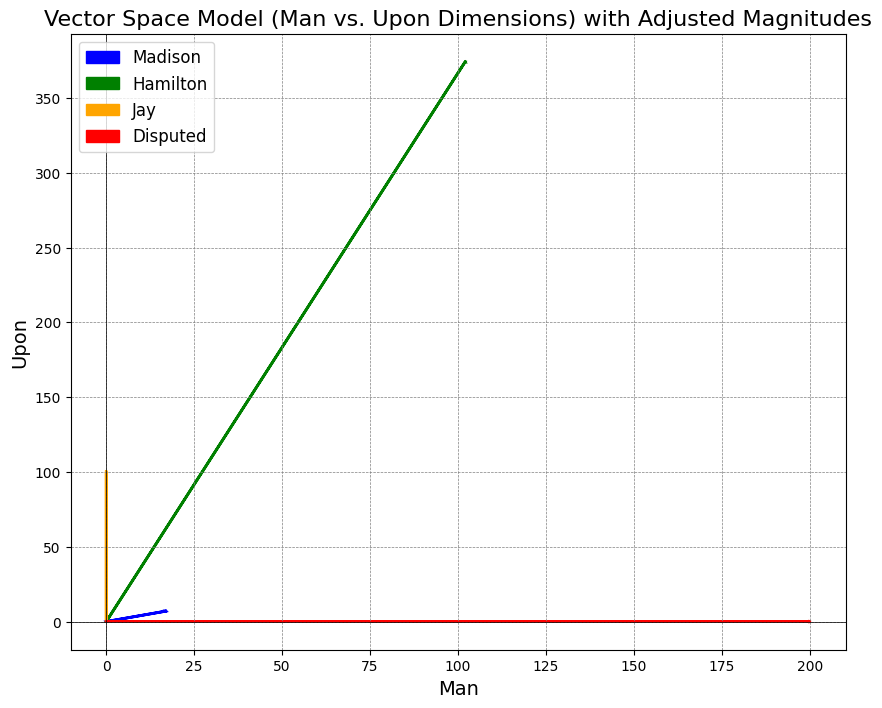

In [14]:
# Increase vector magnitude for Disputed and Jay vectors
vector_visualizations_no_by.loc[3, ["man", "upon"]] *= 100  # Disputed vector (row index 3)
vector_visualizations_no_by.loc[2, ["man", "upon"]] *= 100  # Jay vector (row index 2)

# Visualization of vectors in 2D (man and upon dimensions) with increased magnitudes
plt.figure(figsize=(10, 8))

# Draw vector arrows with separate colors
for _, row in vector_visualizations_no_by.iterrows():
    plt.arrow(0, 0, row["man"], row["upon"],
              head_width=0.2, head_length=0.2, linewidth=2,
              color=colors[row["author"]], label=row["author"])

# Add labels and style
plt.title("Vector Space Model (Man vs. Upon Dimensions) with Adjusted Magnitudes", fontsize=16)
plt.xlabel("Man", fontsize=14)
plt.ylabel("Upon", fontsize=14)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Add legend
handles = [mpatches.Patch(color=color, label=author) for author, color in colors.items()]
plt.legend(handles=handles, loc="upper left", fontsize=12)

# Show the plot
plt.show()


## Cosine similarity

Cosine similarity is ***!!! SURPRISE SURPRISE !!!*** a **similarity** measure between two vectors.

It is defined as:

$$
cos(\theta) = \frac{\mathbf{A} \cdot \mathbf{B}}{||\mathbf{A}|| ||\mathbf{B}||}
$$

Where $\mathbf{A} \cdot \mathbf{B} = A_1 \times B_1 + A_2 \times B_2 ...$ is the dot product of vectors, `np.dot` function in `numpy`. And $||A||$ is the **magnitude** (or, **Eucledian Norm**) of the vector -- $\sqrt{\Sigma^b_{i = 1}A^2_i}$.



$$
cos(\theta) = \frac{\mathbf{A} \cdot \mathbf{B}}{||\mathbf{A}|| ||\mathbf{B}||} = \frac{\Sigma^b_{i=1}A_iB_i}{\sqrt{\Sigma^b_{i = 1}A^2_i}\sqrt{\Sigma^b_{i = 1}B^2_i}}
$$


In [27]:
import numpy as np

# Define the cosine similarity function
def cosine_similarity(A, B):
    """
    Calculate the cosine similarity between two vectors A and B.
    """
    numerator = np.dot(A, B)  # Dot product
    denominator = np.sqrt(np.sum(A ** 2)) * np.sqrt(np.sum(B ** 2))  # Magnitude product
    similarity = numerator / denominator
    return similarity

# Prepare the data for analysis
vectors = vector_visualizations[["man", "by", "upon"]].to_numpy()

# Calculate similarity matrix
num_vectors = vectors.shape[0]
similarity_matrix = np.zeros((num_vectors, num_vectors))

for i in range(num_vectors):
    for j in range(num_vectors):
        similarity_matrix[i, j] = cosine_similarity(vectors[i], vectors[j])

# Add author labels to the matrix
authors = vector_visualizations["author"]
similarity_df = pd.DataFrame(similarity_matrix, index=authors, columns=authors)

# Display the similarity matrix
print("Cosine Similarity Matrix:")
print(similarity_df)


Cosine Similarity Matrix:
author     Madison  Hamilton       Jay  Disputed
author                                          
Madison   1.000000  0.920531  0.999354  0.995220
Hamilton  0.920531  1.000000  0.916252  0.917789
Jay       0.999354  0.916252  1.000000  0.991154
Disputed  0.995220  0.917789  0.991154  1.000000


We don't have tons of data, so everything is very similar to everything else. But, it still provides evidence to the hypothesis, that the `Disputed` paper was written by `Madison`. Note that the highest similarity is with `Jay`, but 1) it was never hypothesized, and 2) the vector for `Jay` is very sparse, so difficult to make any meaningful measurements. 


Once again, for ***NO ADDITIONAL POINTS*** calculate the similarity between `Madison`, `Hamilton` and all other disputed papers (one by one). We can check which ones are disputed:

In [12]:
hamilton_or_madison = federalist[federalist['author'] == "HAMILTON OR MADISON"]

# Stop words and other preprocessing effects

What are the most used words in the federalist papers?

Dimensions of DTM: (85, 8760)
  word  frequency
0  the      17738
1   of      11798
2   to       7051
3  and       5079
4   in       4439


Text(0.5, 1.0, 'Word Frequency Across Federalist')

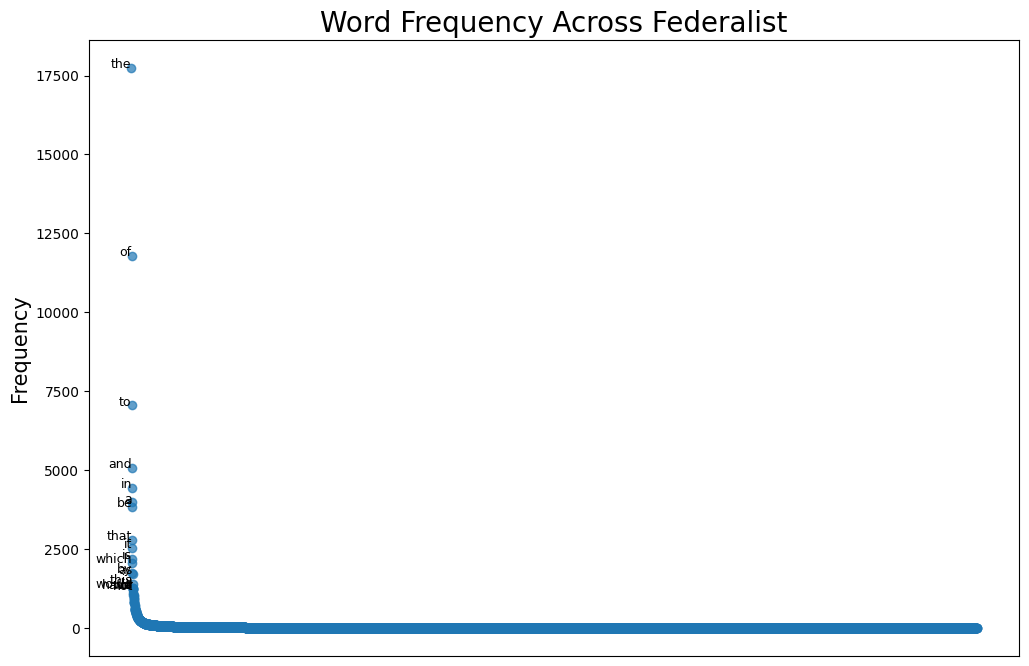

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd

# Create a Document-Term Matrix (DTM) without removing stopwords
vectorizer = CountVectorizer(lowercase=True, token_pattern=r'\b\w+\b')  # Tokenize words
dtm_federalist = vectorizer.fit_transform(federalist['clean_text'])  # DTM as a sparse matrix

# Convert DTM to a DataFrame
dtm_df = pd.DataFrame(dtm_federalist.toarray(), columns=vectorizer.get_feature_names_out())

# Get the dimensions of the DTM
print("Dimensions of DTM:", dtm_df.shape)

# Calculate the most frequent words
most_frequent = dtm_df.sum(axis=0).sort_values(ascending=False)

# Convert to DataFrame for visualization
most_frequent_df = most_frequent.reset_index()
most_frequent_df.columns = ['word', 'frequency']

# Display the most frequent words
print(most_frequent_df.head())

# Visualization of word frequencies
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(12, 8))
plt.scatter(
    x=most_frequent_df['word'],
    y=most_frequent_df['frequency'],
    alpha=0.7
)
for i, row in most_frequent_df.iterrows():
    if row['frequency'] > 1200:
        plt.text(
            i,
            row['frequency'],
            row['word'],
            fontsize=9,
            ha='right'
        )
plt.xticks([])
plt.ylabel("Frequency", fontsize=15)
plt.title("Word Frequency Across Federalist", fontsize=20)


Zipf's Law (for many types of data studied in the physical and social sciences, the rank-frequency distribution is an inverse relation):

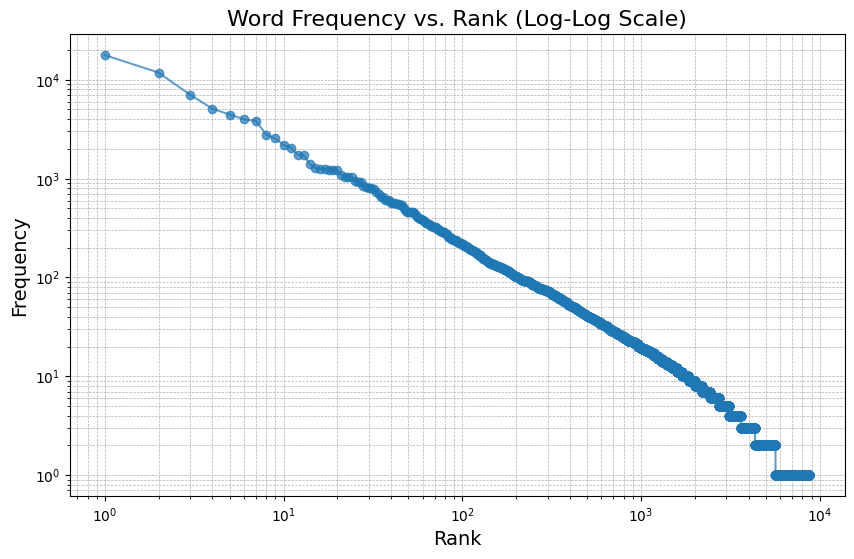

In [16]:
# Add rank to the most frequent words DataFrame
most_frequent_df['rank'] = most_frequent_df['frequency'].rank(ascending=False, method='first')

# Rank-Frequency Plot (Log-Log Scale)
plt.figure(figsize=(10, 6))

plt.plot(
    most_frequent_df['rank'],
    most_frequent_df['frequency'],
    marker='o', linestyle='-', alpha=0.7
)

# Log-log scaling
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel("Rank", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Word Frequency vs. Rank (Log-Log Scale)", fontsize=16)
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.5)

# Display the plot
plt.show()


Dimensions of DTM: (85, 8488)
         word  frequency
0      states        844
1  government        823
2       state        786
3      people        610
4       power        606


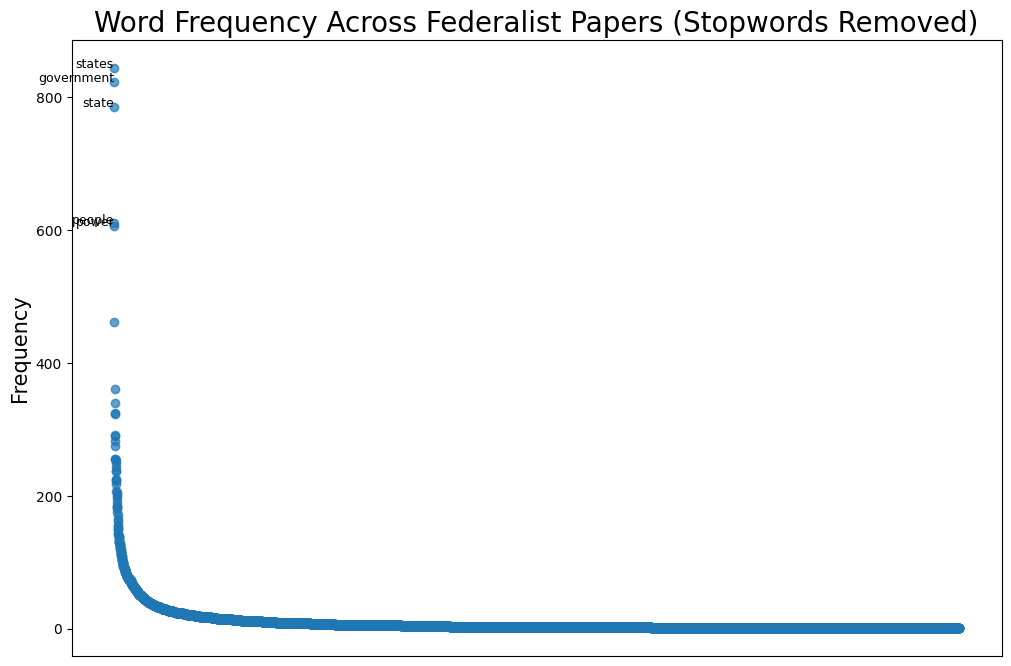

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Create a Document-Term Matrix (DTM) with stopwords removed
vectorizer = CountVectorizer(lowercase=True, token_pattern=r'\b\w+\b', stop_words='english')
dtm_federalist = vectorizer.fit_transform(federalist['clean_text'])

# Convert DTM to a DataFrame
dtm_df = pd.DataFrame(dtm_federalist.toarray(), columns=vectorizer.get_feature_names_out())

# Get the dimensions of the DTM
print("Dimensions of DTM:", dtm_df.shape)

# Calculate the most frequent words
most_frequent = dtm_df.sum(axis=0).sort_values(ascending=False)

# Convert to DataFrame for visualization
most_frequent_df = most_frequent.reset_index()
most_frequent_df.columns = ['word', 'frequency']

# Display the most frequent words
print(most_frequent_df.head())

# Visualize word frequencies (Highlight words with frequency > 500)
plt.figure(figsize=(12, 8))
plt.scatter(
    x=most_frequent_df['word'],
    y=most_frequent_df['frequency'],
    alpha=0.7
)
for i, row in most_frequent_df.iterrows():
    if row['frequency'] > 500:
        plt.text(
            i,
            row['frequency'],
            row['word'],
            fontsize=9,
            ha='right'
        )
plt.xticks([])
plt.ylabel("Frequency", fontsize=15)
plt.title("Word Frequency Across Federalist Papers (Stopwords Removed)", fontsize=20)
plt.show()


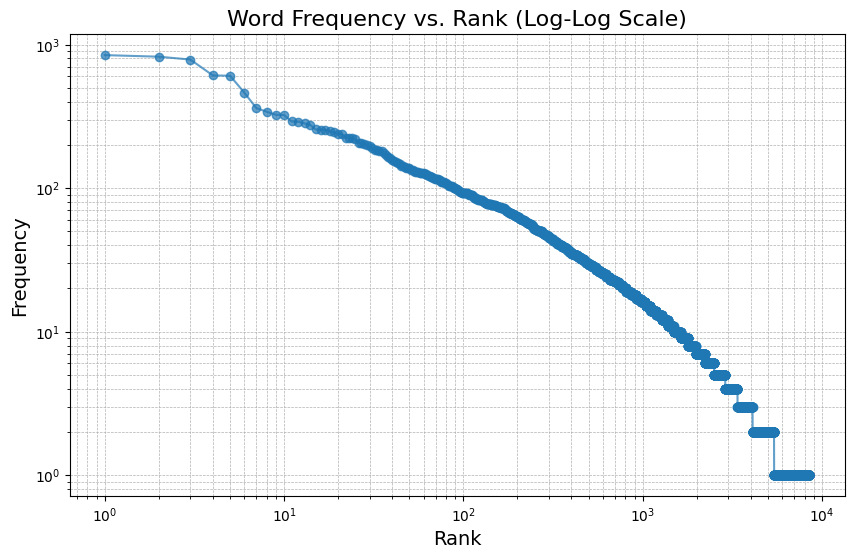

In [18]:
# Add rank to the most frequent words DataFrame
most_frequent_df['rank'] = most_frequent_df['frequency'].rank(ascending=False, method='first')

# Rank-Frequency Plot (Log-Log Scale)
plt.figure(figsize=(10, 6))

plt.plot(
    most_frequent_df['rank'],
    most_frequent_df['frequency'],
    marker='o', linestyle='-', alpha=0.7
)

# Log-log scaling
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel("Rank", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Word Frequency vs. Rank (Log-Log Scale)", fontsize=16)
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.5)

# Display the plot
plt.show()


# TFIDF

$$
W_{ij} \times log\frac{N}{n_j}
$$

Super easy, actually. There's already a function implemented in the `sklearn` package. It's called `TfidfVectorizer`.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Create a TF-IDF matrix with stopwords removed
tfidf_vectorizer = TfidfVectorizer(lowercase=True, token_pattern=r'\b\w+\b', stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(federalist['clean_text'])

# Convert TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Get the dimensions of the TF-IDF matrix
print("Dimensions of TF-IDF Matrix:", tfidf_df.shape)

# Calculate the most frequent terms by summing TF-IDF scores across all documents
most_frequent_tfidf = tfidf_df.sum(axis=0).sort_values(ascending=False)

# Convert to a DataFrame for visualization
most_frequent_tfidf_df = most_frequent_tfidf.reset_index()
most_frequent_tfidf_df.columns = ['word', 'tfidf_score']

# Display the most frequent terms by TF-IDF score
print(most_frequent_tfidf_df.head())


Dimensions of TF-IDF Matrix: (85, 8488)
         word  tfidf_score
0  government     7.377179
1      states     7.295984
2       state     6.818396
3      people     5.619487
4       power     5.416724


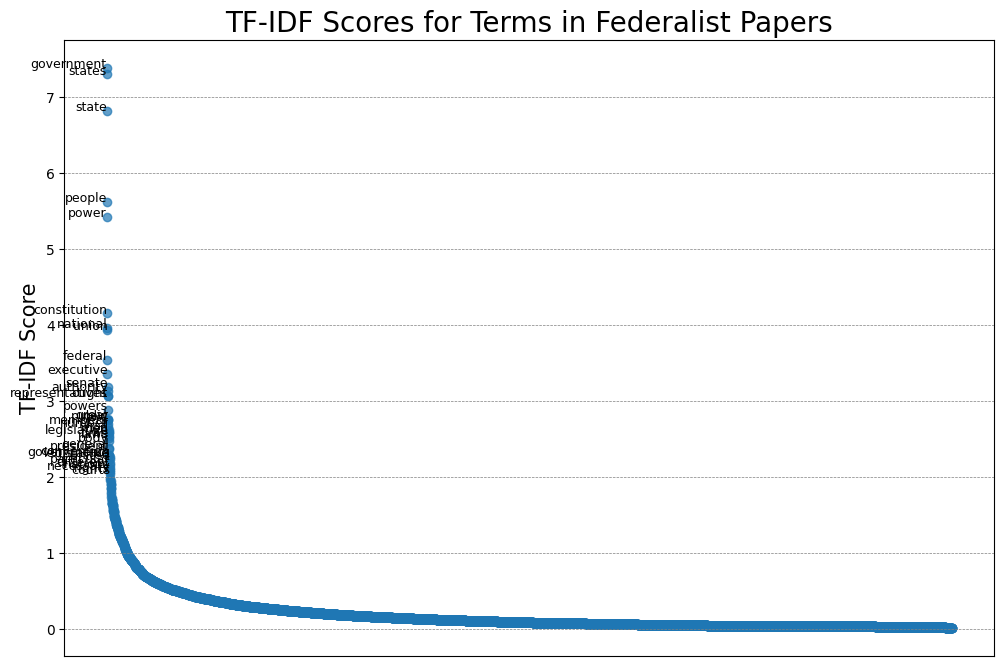

In [20]:

# Define a threshold for labeling
threshold = 2

# Create a scatter plot for TF-IDF scores
plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(
    most_frequent_tfidf_df['word'],
    most_frequent_tfidf_df['tfidf_score'],
    alpha=0.7
)

# Add labels for terms with scores above the threshold
for i, row in most_frequent_tfidf_df.iterrows():
    if row['tfidf_score'] > threshold:
        plt.text(
            i,
            row['tfidf_score'],
            row['word'],
            fontsize=9,
            ha='right'
        )

# Customize plot appearance
plt.xticks([])
plt.ylabel("TF-IDF Score", fontsize=15)
plt.title("TF-IDF Scores for Terms in Federalist Papers", fontsize=20)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Remove axis ticks and labels for a clean look
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.show()

# Log Odds

First, let's see if `tfidf` can be a good discriminant function between `Hamilton` and `Madison`?

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/petrotolochko/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


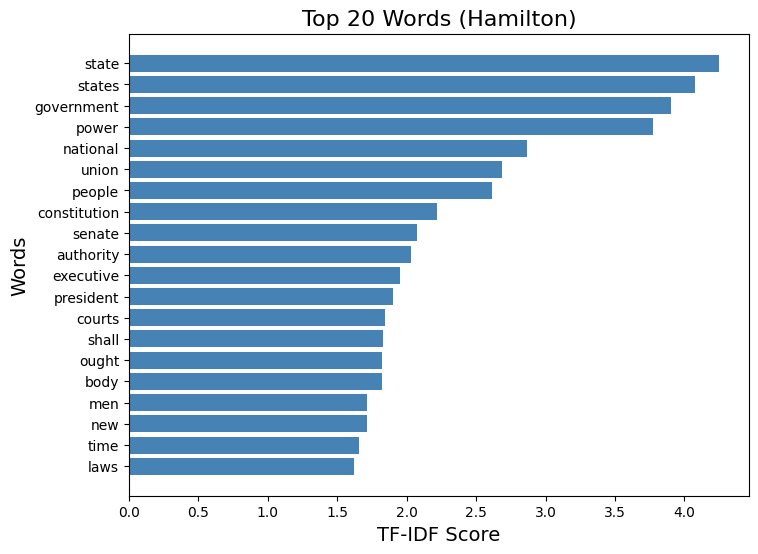

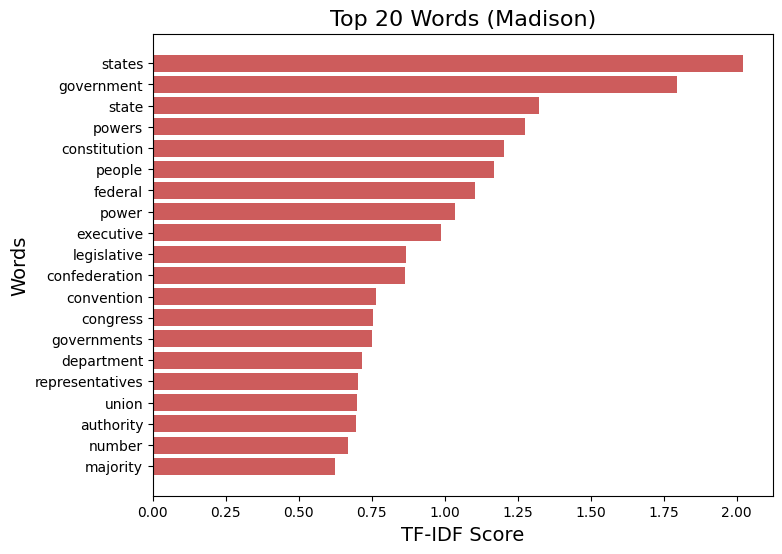

In [21]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')

# Tokenize the text using NLTK's tokenizer
federalist['tokenized_text'] = federalist['clean_text'].apply(word_tokenize)

# Join the tokens back into a string for TF-IDF (required format for TfidfVectorizer)
federalist['processed_text'] = federalist['tokenized_text'].apply(lambda x: ' '.join(x))

# Create a TF-IDF matrix with stopwords removed
tfidf_vectorizer = TfidfVectorizer(lowercase=True, token_pattern=r'\b\w+\b', stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(federalist['processed_text'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df['author'] = federalist['author']

# Split the TF-IDF scores by author
hamilton_ids = tfidf_df['author'] == "HAMILTON"
madison_ids = tfidf_df['author'] == "MADISON"

most_frequent_hamilton = tfidf_df[hamilton_ids].drop(columns=['author']).sum(axis=0).sort_values(ascending=False)
most_frequent_madison = tfidf_df[madison_ids].drop(columns=['author']).sum(axis=0).sort_values(ascending=False)

# Convert the results into DataFrames for visualization
most_frequent_df_hamilton = pd.DataFrame({
    'word': most_frequent_hamilton.index,
    'tfidf_score': most_frequent_hamilton.values,
    'author': 'HAMILTON'
})
most_frequent_df_madison = pd.DataFrame({
    'word': most_frequent_madison.index,
    'tfidf_score': most_frequent_madison.values,
    'author': 'MADISON'
})

# Combine the DataFrames
most_frequent_df = pd.concat([most_frequent_df_hamilton, most_frequent_df_madison])

# Plot top terms for Hamilton
hamilton_top_words = most_frequent_df[most_frequent_df['author'] == 'HAMILTON'].nlargest(20, 'tfidf_score')
plt.figure(figsize=(8, 6))
plt.barh(hamilton_top_words['word'], hamilton_top_words['tfidf_score'], color='steelblue')
plt.title('Top 20 Words (Hamilton)', fontsize=16)
plt.xlabel('TF-IDF Score', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.gca().invert_yaxis()  # Reverse the order of bars
plt.show()

# Plot top terms for Madison
madison_top_words = most_frequent_df[most_frequent_df['author'] == 'MADISON'].nlargest(20, 'tfidf_score')
plt.figure(figsize=(8, 6))
plt.barh(madison_top_words['word'], madison_top_words['tfidf_score'], color='indianred')
plt.title('Top 20 Words (Madison)', fontsize=16)
plt.xlabel('TF-IDF Score', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.gca().invert_yaxis()  # Reverse the order of bars
plt.show()


Let's try to calculate log odds.

$$
logO^i_w = log\frac{f^i_w}{1 - f^i_w}
$$

In [23]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Create a Document-Term Matrix (DTM) with stopwords removed
vectorizer = CountVectorizer(
    lowercase=True, 
    token_pattern=r'\b[a-zA-Z]+\b',  # Include only alphabetic tokens
    stop_words='english'
)

dtm_federalist = vectorizer.fit_transform(federalist['clean_text'])

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Filter rows by author
hamilton_ids = federalist['author'] == "HAMILTON"
madison_ids = federalist['author'] == "MADISON"

# Calculate term frequencies for Hamilton and Madison
dtm_hamilton = dtm_federalist[hamilton_ids].toarray().sum(axis=0)
dtm_madison = dtm_federalist[madison_ids].toarray().sum(axis=0)

# Apply Laplace smoothing
freq_hamilton = (dtm_hamilton + 1) / (dtm_hamilton.sum() + len(feature_names))
freq_madison = (dtm_madison + 1) / (dtm_madison.sum() + len(feature_names))

# Log-odds function
def log_odds(freq):
    return np.log(freq / (1 - freq))

# Calculate log-odds for Hamilton and Madison
log_odds_ham = log_odds(freq_hamilton)
log_odds_mad = log_odds(freq_madison)

# Combine results into a DataFrame for easier inspection
log_odds_df = pd.DataFrame({
    'word': feature_names,
    'log_odds_hamilton': log_odds_ham,
    'log_odds_madison': log_odds_mad
})

# Display the log-odds DataFrame
print(log_odds_df.head())


         word  log_odds_hamilton  log_odds_madison
0     abandon          -9.493412         -9.023127
1   abandoned          -9.493412        -10.121820
2  abandoning         -10.186597        -10.121820
3       abate         -10.186597        -10.121820
4  abatements         -10.879763        -10.121820



Now, log odds ratio:

$$
log\frac{O^i_w}{O^j_w} = log\frac{f^i_w}{1 - f^i_w}/\frac{f^j_w}{1 - f^j_w} = log\frac{f^i_w}{1 - f^i_w} - log\frac{f^j_w}{1 - f^j_w}
$$

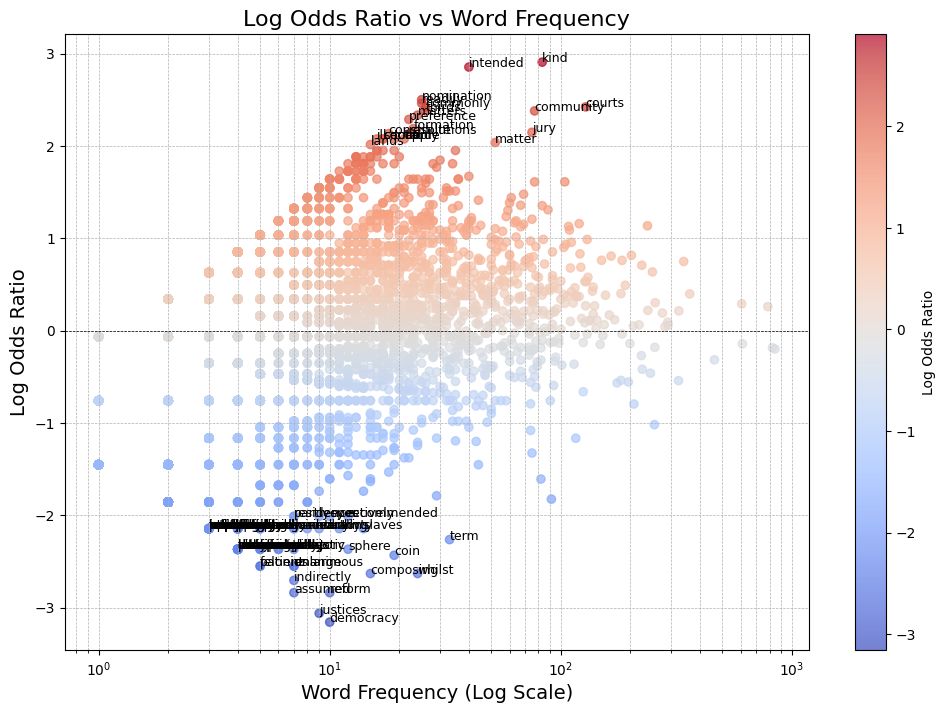

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate log-odds ratio
log_odds_ratio = log_odds_ham - log_odds_mad

# Combine log-odds ratio with word frequencies
general_frequency = np.array(dtm_federalist.toarray().sum(axis=0))  # Total frequency of each word across all documents
log_odds_ratio_df = pd.DataFrame({
    'word': feature_names,
    'log_odds_ratio': log_odds_ratio,
    'frequency': general_frequency
})

# Filter for visualization
log_odds_ratio_df['label'] = log_odds_ratio_df.apply(
    lambda row: row['word'] if row['log_odds_ratio'] > 2 or row['log_odds_ratio'] < -2 else '', axis=1
)

# Scatter plot of log-odds ratio vs. frequency
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    log_odds_ratio_df['frequency'],
    log_odds_ratio_df['log_odds_ratio'],
    c=log_odds_ratio_df['log_odds_ratio'],
    cmap='coolwarm',
    alpha=0.7
)
plt.colorbar(scatter, label="Log Odds Ratio")
for _, row in log_odds_ratio_df.iterrows():
    if row['label']:
        plt.text(row['frequency'], row['log_odds_ratio'], row['label'], fontsize=9)

plt.xscale('log')  # Log scale for frequency
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel("Word Frequency (Log Scale)", fontsize=14)
plt.ylabel("Log Odds Ratio", fontsize=14)
plt.title("Log Odds Ratio vs Word Frequency", fontsize=16)
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.5)
plt.show()


## Top words for Hamilton and Madison

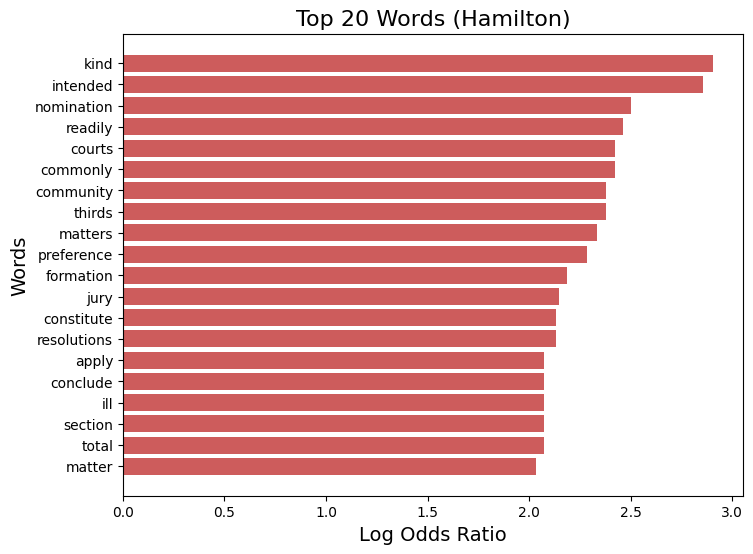

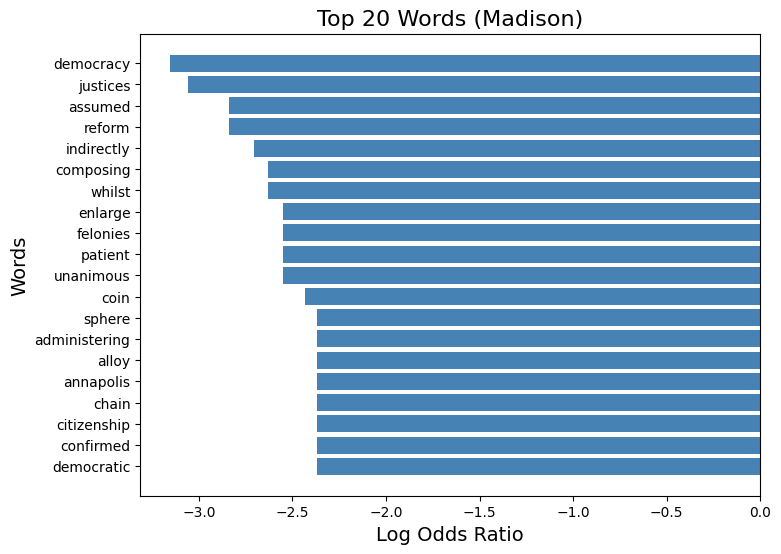

In [25]:

# Bar plots for top 20 words with highest and lowest log-odds ratio
top_hamilton = log_odds_ratio_df.nlargest(20, 'log_odds_ratio')
top_madison = log_odds_ratio_df.nsmallest(20, 'log_odds_ratio')

# Plot for Hamilton
plt.figure(figsize=(8, 6))
plt.barh(top_hamilton['word'], top_hamilton['log_odds_ratio'], color='indianred')
plt.title('Top 20 Words (Hamilton)', fontsize=16)
plt.xlabel('Log Odds Ratio', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

# Plot for Madison
plt.figure(figsize=(8, 6))
plt.barh(top_madison['word'], top_madison['log_odds_ratio'], color='steelblue')
plt.title('Top 20 Words (Madison)', fontsize=16)
plt.xlabel('Log Odds Ratio', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.gca().invert_yaxis()
plt.show()